In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [160]:
full_data = pd.read_csv('ads_data.csv')
full_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [64]:
full_data['full_date'] = pd.to_datetime(full_data.time, unit='s')
full_data.date = pd.to_datetime(full_data.date)
full_data

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176709,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,5467,2019-04-05 21:51:32
3176710,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,2508,2019-04-05 21:51:32
3176711,112583,1554501092,click,2019-04-06,CPM,0,111818,112260,web,199.4,239408,7896,2019-04-05 21:51:32
3176712,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,ios,199.4,239408,4319,2019-04-05 21:51:32


Получить статистику по дням: просчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.

<AxesSubplot:xlabel='date'>

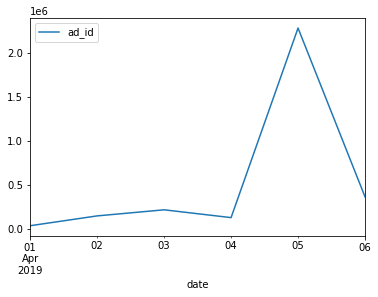

In [65]:
full_data.groupby('date') \
    .agg({'ad_id': 'count'}).plot()

In [66]:
full_data.groupby(['date','event'], as_index=False) \
    .agg({'ad_id': 'count'}) \
    .pivot(index='date', columns='event', values='ad_id').reset_index()

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [78]:
df_count_of_uniq_ad = full_data.groupby(['date', 'ad_id'], as_index=False) \
    .agg({'user_id':'count'}) \
    .groupby('date', as_index=False) \
    .agg({'ad_id':'count'}) \
    .rename(columns={'ad_id': 'count_of_uniq_ad'})
df_count_of_uniq_ad #число уникальных объявлений по дням

,date,count_of_uniq_ad
0,2019-04-01,49
1,2019-04-02,146
2,2019-04-03,179
3,2019-04-04,150
4,2019-04-05,131
5,2019-04-06,61


In [79]:
df_count_of_uniq_cam = full_data.groupby(['date', 'campaign_union_id'], as_index=False) \
    .agg({'user_id':'count'}) \
    .groupby('date', as_index=False) \
    .agg({'campaign_union_id':'count'}) \
    .rename(columns={'campaign_union_id': 'count_of_uniq_ad'})
df_count_of_uniq_cam #число уникальных кампаний по дням

,date,count_of_uniq_ad
0,2019-04-01,49
1,2019-04-02,146
2,2019-04-03,177
3,2019-04-04,147
4,2019-04-05,130
5,2019-04-06,60


Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?


In [86]:
full_data[full_data.date == '2019-04-05'] \
    .groupby('ad_id', as_index=False) \
    .agg({'time':'count'}) \
    .sort_values('time', ascending=False) \
    .head()

,ad_id,time
108,112583,2166611
27,29927,27186
65,44635,8268
81,46583,7327
66,44956,5656
...,...,...
77,46433,17
17,21405,16
76,46024,16
112,113867,15


In [92]:
extr_ad_id = 112583

In [94]:
full_data.query('ad_id == @extr_ad_id') \
    .groupby('date', as_index=False) \
    .agg({'time':'count'})

,date,time
0,2019-04-05,2166611
1,2019-04-06,348613


In [95]:
full_data.query('ad_id == @extr_ad_id').head(3)

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 16:10:36
527125,112583,1554480636,click,2019-04-05,CPM,0,111818,112260,android,199.4,239408,6243,2019-04-05 16:10:36
527126,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,android,199.4,239408,2470,2019-04-05 16:10:36


Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех кликов объявлений к просмотрам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?

In [112]:
ads_data = full_data \
    .groupby(['ad_id','event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() 
ads_data.head()

event,ad_id,click,view
0,3,9.0,490.0
1,2132,1.0,95.0
2,2276,2.0,1454.0
3,2475,NaN,132.0
4,2643,3.0,286.0


In [123]:
ads_data = ads_data.assign(ctr = ads_data.click / ads_data.view,  ctr_per = 100 * ads_data.click / ads_data.view)
ads_data.head(10)

event,ad_id,click,view,ctr,ctr_per
0,3,9.0,490.0,0.018367,1.836735
1,2132,1.0,95.0,0.010526,1.052632
2,2276,2.0,1454.0,0.001376,0.137552
3,2475,NaN,132.0,NaN,NaN
4,2643,3.0,286.0,0.010490,1.048951
5,4585,53.0,476.0,0.111345,11.134454
6,4877,5.0,2160.0,0.002315,0.231481
7,5028,14.0,569.0,0.024605,2.460457
8,7518,10.0,426.0,0.023474,2.347418
9,9071,7.0,441.0,0.015873,1.587302


In [120]:
ads_data.ctr.mean()

0.020628096080757965

In [119]:
ads_data.ctr.median()

0.010753240746688594

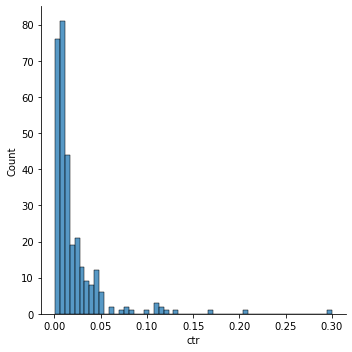

In [121]:
sns.displot(ads_data.ctr)

Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

In [125]:
ads_data = ads_data.fillna(0)

event,ad_id,click,view,ctr,ctr_per
0,3,9.0,490.0,0.018367,1.836735
1,2132,1.0,95.0,0.010526,1.052632
2,2276,2.0,1454.0,0.001376,0.137552
3,2475,0.0,132.0,0.000000,0.000000
4,2643,3.0,286.0,0.010490,1.048951
...,...,...,...,...,...
350,121941,1.0,640.0,0.001563,0.156250
351,121943,15.0,1722.0,0.008711,0.871080
352,122042,1.0,155.0,0.006452,0.645161
353,122063,1.0,260.0,0.003846,0.384615


In [127]:
ads_with_bug = ads_data.query('view == 0').ad_id

In [146]:
full_data[full_data.ad_id.isin(ads_with_bug)] \
    .groupby('platform', as_index=False) \
    .agg({'ad_id':'count'}) 

,platform,ad_id
0,android,141
1,ios,92
2,web,53


Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

In [167]:
ads_with_video = full_data \
    .query('has_video == 1') \
    .groupby(['ad_id','event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() 

In [169]:
ads_with_video.fillna(0)
ads_with_video = ads_with_video.assign(ctr = ads_with_video.click / ads_with_video.view,  \
                                       ctr_per = 100 * ads_with_video.click / ads_with_video.view)
ads_with_video.ctr_per.mean()

0.5307989541006454

In [173]:
ads_without_video = full_data \
    .query('has_video == 0') \
    .groupby(['ad_id','event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() 

In [176]:
ads_without_video.fillna(0)
ads_without_video = ads_without_video.assign(ctr = ads_without_video.click / ads_without_video.view,  \
                                       ctr_per = 100 * ads_without_video.click / ads_without_video.view)
ads_without_video.ctr_per.mean()

2.083101139916527

In [155]:
df_2019_04_04 = full_data[full_data.date == '2019-04-04'] \
    .groupby(['ad_id','event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index()
df_2019_04_04

In [159]:
df_2019_04_04.ctr.quantile(q=0.95)

0.10211538461538454

Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена 200 рублей, то за один показ мы зарабатываем 200 / 1000.

In [181]:
daily_cpc_cash = full_data[(full_data.ad_cost_type == 'CPC') & (full_data.event == 'click')] \
    .groupby('date',as_index=False) \
    .agg({'ad_cost':'sum'})
daily_cpc_cash.head()

,date,ad_cost
0,2019-04-01,7036.9
1,2019-04-02,7663.7
2,2019-04-03,38597.2
3,2019-04-04,26878.0
4,2019-04-05,4381.2


In [183]:
daily_cpm_cash = full_data[(full_data.ad_cost_type == 'CPM') & (full_data.event == 'view')] \
    .groupby('date',as_index=False) \
    .agg({'ad_cost':'sum'})
daily_cpm_cash.ad_cost = daily_cpm_cash.ad_cost / 1000
daily_cpm_cash.head()

,date,ad_cost
0,2019-04-01,6122.8123
1,2019-04-02,26173.3051
2,2019-04-03,34612.3170
3,2019-04-04,19416.3568
4,2019-04-05,354178.5490


Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ?

In [185]:
full_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [192]:
platform_rate = full_data \
    .groupby('platform', as_index=False) \
    .agg({'ad_id':'count'}) \
    .sort_values('ad_id', ascending=False) \
    .rename(columns={'ad_id':'ad_count'})
platform_rate

,platform,ad_count
0,android,1588211
1,ios,953078
2,web,635425


In [193]:
platforms_per_view = full_data \
    .query("event == 'view'") \
    .groupby('platform', as_index=False) \
    .agg({'event':'count'}) \
    .sort_values('event', ascending=False) \
    .rename(columns={'event':'views_count'}) 

,platform,views_count
0,android,1295189
1,ios,776114
2,web,517948


In [199]:
platforms_per_view = platforms_per_view \
    .assign(per = 100 * platforms_per_view.views_count / full_data.query("event == 'view'").shape[0])
platforms_per_view

,platform,views_count,per
0,android,1295189,50.021763
1,ios,776114,29.974460
2,web,517948,20.003777


А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [206]:
full_data \
    .groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'min'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .query('click < view')

event,ad_id,click,view
27,16548,1.554336e+09,1.554336e+09
81,30939,1.554165e+09,1.554173e+09
138,40464,1.554164e+09,1.554164e+09
158,42007,1.554423e+09,1.554423e+09
185,44543,1.554336e+09,1.554337e+09
201,45436,1.554336e+09,1.554336e+09
324,119450,1.554336e+09,1.554336e+09
